In [21]:
import chess.pgn
import os
import chess
import numpy as np
import pandas as pd
from keras import callbacks, optimizers
from keras.layers import (LSTM, BatchNormalization, Dense, Dropout, Flatten, TimeDistributed)
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential, load_model, model_from_json
from IPython.display import clear_output
from matplotlib import pyplot as plt
from keras.models import Sequential, load_model, model_from_json
from IPython.display import clear_output
from matplotlib import pyplot as plt
import os, glob
from random import shuffle
from tensorflow import keras


In [22]:
path = 'D:/chess'

count = 1
my_list=[]
for filename in glob.glob(os.path.join(path, '*.pgn')):
    with open(os.path.join(os.getcwd(), filename), 'r') as pgn:
        print(pgn)
        while True:
            try:
                game =  chess.pgn.read_game(pgn)
                if game == None:
                    break
                my_list.append(game.mainline_moves())
            except ValueError:
                print(f"error:{count}")
                count+=1
                continue
    
print (f"size:{len(my_list)}")


<_io.TextIOWrapper name='D:/chess\\Adams - OK.pgn' mode='r' encoding='cp1251'>
<_io.TextIOWrapper name='D:/chess\\Alekhine.pgn' mode='r' encoding='cp1251'>
<_io.TextIOWrapper name='D:/chess\\Anand - OK.pgn' mode='r' encoding='cp1251'>
<_io.TextIOWrapper name='D:/chess\\Carlsen.pgn' mode='r' encoding='cp1251'>
<_io.TextIOWrapper name='D:/chess\\Caruana.pgn' mode='r' encoding='cp1251'>
<_io.TextIOWrapper name='D:/chess\\Ding.pgn' mode='r' encoding='cp1251'>
<_io.TextIOWrapper name='D:/chess\\Firouzja.pgn' mode='r' encoding='cp1251'>
<_io.TextIOWrapper name='D:/chess\\Ivanchuk.pgn' mode='r' encoding='cp1251'>
<_io.TextIOWrapper name='D:/chess\\Karpov.pgn' mode='r' encoding='cp1251'>
<_io.TextIOWrapper name='D:/chess\\Kasparov - OK.pgn' mode='r' encoding='cp1251'>
<_io.TextIOWrapper name='D:/chess\\Kosteniuk.pgn' mode='r' encoding='cp1251'>
<_io.TextIOWrapper name='D:/chess\\Nakamura.pgn' mode='r' encoding='cp1251'>
<_io.TextIOWrapper name='D:/chess\\Nepomniachtchi.pgn' mode='r' encoding='

In [23]:
shuffle(my_list)

In [24]:
chess_dict = {
    'p' : [1,0,0,0,0,0,0,0,0,0,0,0],
    'P' : [0,0,0,0,0,0,1,0,0,0,0,0],
    'n' : [0,1,0,0,0,0,0,0,0,0,0,0],
    'N' : [0,0,0,0,0,0,0,1,0,0,0,0],
    'b' : [0,0,1,0,0,0,0,0,0,0,0,0],
    'B' : [0,0,0,0,0,0,0,0,1,0,0,0],
    'r' : [0,0,0,1,0,0,0,0,0,0,0,0],
    'R' : [0,0,0,0,0,0,0,0,0,1,0,0],
    'q' : [0,0,0,0,1,0,0,0,0,0,0,0],
    'Q' : [0,0,0,0,0,0,0,0,0,0,1,0],
    'k' : [0,0,0,0,0,1,0,0,0,0,0,0],
    'K' : [0,0,0,0,0,0,0,0,0,0,0,1],
    '.' : [0,0,0,0,0,0,0,0,0,0,0,0],
}
alpha_dict = {
    'a' : [0,0,0,0,0,0,0],
    'b' : [1,0,0,0,0,0,0],
    'c' : [0,1,0,0,0,0,0],
    'd' : [0,0,1,0,0,0,0],
    'e' : [0,0,0,1,0,0,0],
    'f' : [0,0,0,0,1,0,0],
    'g' : [0,0,0,0,0,1,0],
    'h' : [0,0,0,0,0,0,1],
}
number_dict = {
    1 : [0,0,0,0,0,0,0],
    2 : [1,0,0,0,0,0,0],
    3 : [0,1,0,0,0,0,0],
    4 : [0,0,1,0,0,0,0],
    5 : [0,0,0,1,0,0,0],
    6 : [0,0,0,0,1,0,0],
    7 : [0,0,0,0,0,1,0],
    8 : [0,0,0,0,0,0,1],
}

In [25]:
def make_matrix(board): #type(board) == chess.Board()
    pgn = board.epd()
    foo = []  #Final board
    pieces = pgn.split(" ", 1)[0]
    rows = pieces.split("/")
    for row in rows:
        foo2 = []  #This is the row I make
        for thing in row:
            if thing.isdigit():
                for i in range(0, int(thing)):
                    foo2.append('.')
            else:
                foo2.append(thing)
        foo.append(foo2)
    return foo
def translate(matrix,chess_dict):
    rows = []
    for row in matrix:
        terms = []
        for term in row:
            terms.append(chess_dict[term])
        rows.append(terms)
    return rows


In [26]:
print("split data")
split_data=[]
for point in my_list:
    move= str(point)
    point = move.split(" ")              
    split_data.append(point)

del my_list





split data


In [27]:
move_data=[]
print("del data")
for i in range(len(split_data)):
    move_data.append([])
    for j in range(len(split_data[i])):
        if  len (split_data[i][j])==0:
            continue
        if not (split_data[i][j][-1]=="." and split_data[i][j][:-1].isdigit()):
            move_data[i].append(split_data[i][j])
            
del split_data
          

del data


In [28]:
print("start")
x= []
for game in range(len(move_data)):
    board = chess.Board()
    for move in range(len(move_data[game])):
        board.push_san(move_data[game][move])
        matrix = make_matrix(board.copy())
        trans = translate(matrix,chess_dict)
        x.append(trans)

start


In [29]:
y=[]
for game in  move_data:
    board = chess.Board()
    for move in game:
       # legal_moves= (str(board.legal_moves)[38:-2]).replace(' ','').split(',')
       # board.push_san(move)
       # y.append(legal_moves.index(move))
    y.append(move)

IndentationError: expected an indented block after 'for' statement on line 4 (1804275833.py, line 8)

In [ ]:
def initialize_network():
    model = Sequential()
    model.add(Conv2D(filters=10, kernel_size=1, activation='relu', input_shape=(8,8,12)))
    model.add(MaxPooling2D(pool_size=2, strides=None))
    model.add(Conv2D(filters=10, kernel_size=1, activation='relu'))
    model.add(MaxPooling2D(pool_size=2, strides=None))
    model.add(Conv2D(filters=10, kernel_size=1, activation='relu'))
    model.add(MaxPooling2D(pool_size=2, strides=None))
    model.add(Conv2D(filters=10, kernel_size=1, activation='relu'))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(1,activation = 'sigmoid'))
    return model

In [ ]:
del move_data

In [ ]:

y_train = np.array(y[:int(len(y)*0.7)])
y_test =np.array(y[int(len(y)*0.7):])
x_train= np.array(x[:int(len(x)*0.7)])
x_test = np.array(x[int(len(x)*0.7):])
print(len(y_train),len(x_train))


In [ ]:
model = initialize_network()

model.compile(optimizer='Nadam', loss='mse')
h5 = 'chess' + '_best_model' + '.h5'
checkpoint = callbacks.ModelCheckpoint(h5,
                                           monitor='val_loss',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=True,
                                           mode='auto',
                                           save_freq=1)
es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5000/10)
callback = [checkpoint,es]


In [ ]:
print("begin training")
history = model.fit((x_train), y_train,epochs = 100,batch_size = 1024,validation_data = (x_test,y_test),callbacks = callback)


begin training
Epoch 1/100
1730/1730 [==============================] - 34s 19ms/step - loss: 334.4709 - val_loss: 332.5823
Epoch 2/100
1730/1730 [==============================] - 33s 19ms/step - loss: 333.6909 - val_loss: 332.5658
Epoch 3/100
 457/1730 [======>.......................] - ETA: 20s - loss: 334.0291WARNING:tensorflow:Can save best model only with val_loss available, skipping.


dict_keys(['loss', 'val_loss'])


KeyError: 'val_accuracy'

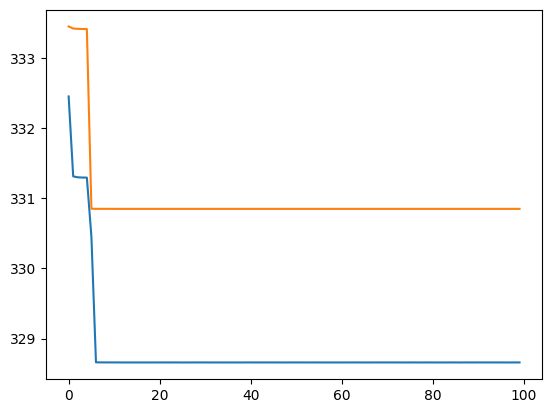

In [33]:
history_dict = history.history
print(history_dict.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('values')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss','accuracy','val_accuracy'], loc='upper left')



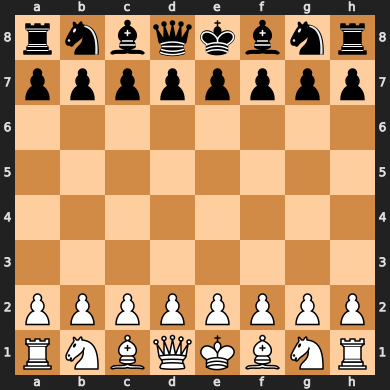

0.0 ms
0.0 ms
Nh3, Nf3, Nc3, Na3, h3, g3, f3, e3, d3, c3, b3, a3, h4, g4, f4, e4, d4, c4, b4, a4
<LegalMoveGenerator at 0x1448894ee00 (Nh3, Nf3, Nc3, Na3, h3, g3, f3, e3, d3, c3, b3, a3, h4, g4, f4, e4, d4, c4, b4, a4)>
[Move.from_uci('g1h3'), Move.from_uci('g1f3'), Move.from_uci('b1c3'), Move.from_uci('b1a3'), Move.from_uci('h2h3'), Move.from_uci('g2g3'), Move.from_uci('f2f3'), Move.from_uci('e2e3'), Move.from_uci('d2d3'), Move.from_uci('c2c3'), Move.from_uci('b2b3'), Move.from_uci('a2a3'), Move.from_uci('h2h4'), Move.from_uci('g2g4'), Move.from_uci('f2f4'), Move.from_uci('e2e4'), Move.from_uci('d2d4'), Move.from_uci('c2c4'), Move.from_uci('b2b4'), Move.from_uci('a2a4')]


chess.LegalMoveGenerator

In [ ]:
import time
board=chess.Board()
display(board)
matrix = make_matrix(board.copy())
trans = translate(matrix,chess_dict)
start = time.time()
legal_moves =  str(board.legal_moves)[38:-2])
for move in legal_moves:
    tr-
end = time.time()
print( (end-start) * 10**3, "ms")
start = time.time()
#legal_moves =  str(board.legal_moves)[38:-2].replace(" ","").split()
end = time.time()
print( (end-start) * 10**3, "ms")
legal_move2=str(board.legal_moves)
legal_move3=list(board.legal_moves)
del legal_move3[:37][:-2]
print(legal_moves)
print(legal_move2)
print(legal_move3)
type(board.legal_moves)


In [69]:
print("fkdlf,gfg, ddf".strip().split(","))

['fkdlf', 'gfg', ' ddf']


In [70]:
print(x[0])

[[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 

In [19]:
len(move_data)

28218

In [36]:
boar=chess.Board()
matrix = make_matrix(board.copy())
trans = translate(matrix,chess_dict)
model.predict(np.array(trans))

ValueError: in user code:

    File "D:\python\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "D:\python\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\python\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "D:\python\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "D:\python\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\python\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 8, 8, 12), found shape=(None, 8, 12)
